In [1]:
#import important libraries.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 

In [2]:
os.chdir("C:\\Users\\MahmoudJamil\\Downloads\\")

In [3]:
#reading dataset by pandas. 
df=pd.read_csv("October_indv.csv")
df

,party_number,party_type_desc,primary_medium_desc,transaction_cdi_desc,Counts,Sums
0,1,Individual,MISC,CREDIT,1,1.62
1,2,Individual,MISC,CREDIT,3,400.00
2,3,Individual,MISC,DEBIT,5,50567.34
3,4,Individual,MISC,DEBIT,1,220.00
4,5,Individual,MISC,CREDIT,1,300.00
...,...,...,...,...,...,...
13533,13534,Individual,MISC,DEBIT,1,18.04
13534,13535,Individual,MISC,CREDIT,1,15447.51
13535,13536,Individual,MISC,DEBIT,2,15444.34
13536,13537,Individual,MISC,DEBIT,3,6500.00


>**party_number** is an index column we can drop it 

# Explore Our Data

In [4]:
#data types for columns.
df.dtypes

party_number              int64
party_type_desc          object
primary_medium_desc      object
transaction_cdi_desc     object
Counts                    int64
Sums                    float64
dtype: object

In [5]:
df.shape

(13538, 6)

In [6]:
df.describe().round(2)

,party_number,Counts,Sums
count,13538.00,13538.00,13538.00
mean,6769.50,2.74,67596.44
std,3908.23,4.24,870114.50
min,1.00,1.00,0.01
25%,3385.25,1.00,850.00
50%,6769.50,1.00,4850.00
75%,10153.75,3.00,22188.94
max,13538.00,81.00,53854950.00


> **Counts** <code> **mean**       **std** 
       **6769.50**     **3908.23**</code><br><br>
**Sums** <code> **mean**       **std** 
      **67596.44**    **870114.50**</code><br><br>
**K-mean** assumptions <ul>
    <li>Variable with the same average values</li>
    <li>Variable with the same varince</li>
    </ul><br>
    so we can Standarliz numeric data by Standard Scaler in sklearn or manually . 

## Exploring more for object data

In [7]:
#select object data.
df_cat=df.select_dtypes('object')

In [8]:
# get information about the count of unique values in object columns.
for name in df_cat.columns:
    print(df[name].value_counts()) 
    print ("*****************************************")

Individual    13538
Name: party_type_desc, dtype: int64
*****************************************
MISC                 8221
CASHED CHECK         1961
DIRECT DEPOSIT       1160
CASH                 1087
WIRE                  922
INTERNAL TRANSFER     177
CHECK                   6
CASH EQUIVALENT         4
Name: primary_medium_desc, dtype: int64
*****************************************
DEBIT     8581
CREDIT    4957
Name: transaction_cdi_desc, dtype: int64
*****************************************


> all Values in **party_type_desc** column = **Individual** , <br>
so we can drop it from our Data 

## Exploring more for numeric data

C:\Users\MahmoudJamil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MahmoudJamil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

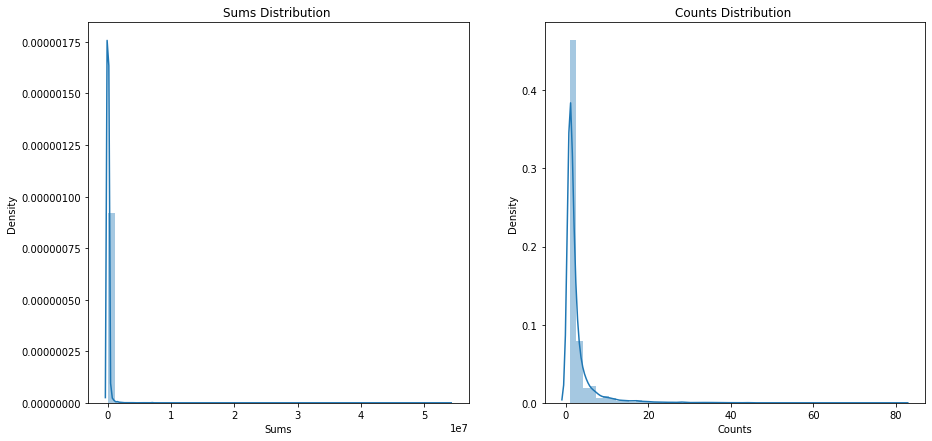

In [9]:
# Visulize The distrbution for every numeric features("Sums","Counts").
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15, 7)
ax[0].set_title("Sums Distribution ")
ax[1].set_title("Counts Distribution ")
sns.distplot(df.Sums,ax=ax[0])
sns.distplot(df.Counts,ax=ax[1])
plt.show

> we can note that the **numeric features("Sums","Counts") right skewed .**<br><br>
**K-mean** assumptions <ul>
    <li>symmetric disribution of variable</li>
    </ul><br>
so **K-mean** do better if data disribution is **symmetric** or closer to **normal disribution ,**<br>
so we should unskew numeric features, we can do that by applaying **log transformation .**  

 ---
 ---
 ---

# Preprocessing 

 <ul>
    <li>Drop unuseful columns</li>
    <li>Apply log tranformation on numeric features (unskew)</li>
    <li>Normalization for numeric features</li>
    </ul><br>

## Drop unuseful columns

In [10]:
df_shortcut=df.iloc[:,2:]

In [11]:
df_shortcut

,primary_medium_desc,transaction_cdi_desc,Counts,Sums
0,MISC,CREDIT,1,1.62
1,MISC,CREDIT,3,400.00
2,MISC,DEBIT,5,50567.34
3,MISC,DEBIT,1,220.00
4,MISC,CREDIT,1,300.00
...,...,...,...,...
13533,MISC,DEBIT,1,18.04
13534,MISC,CREDIT,1,15447.51
13535,MISC,DEBIT,2,15444.34
13536,MISC,DEBIT,3,6500.00


## Apply log tranformation on numeric features (unskew)

In [12]:
df_shortcut["Sums"]=np.log(df_shortcut.Sums)
df_shortcut["Counts"]=np.log(df_shortcut.Counts)

C:\Users\MahmoudJamil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MahmoudJamil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

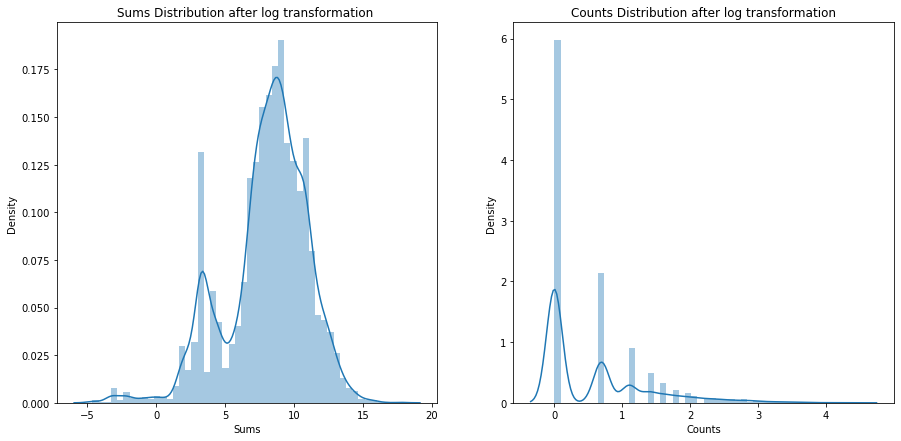

In [13]:
# Visulize The distrbution for every numeric features("Sums","Counts") after Apply log tranformation .
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15, 7)
ax[0].set_title("Sums Distribution after log transformation ")
ax[1].set_title("Counts Distribution after log transformation")
sns.distplot(df_shortcut.Sums,ax=ax[0])
sns.distplot(df_shortcut.Counts,ax=ax[1])
plt.show

> After applying log transformation on numeric features;<br>
the **Counts** features still skewed, so we have two choice :<br><ul>
    <li> drop this featur</li>
    <li> Go ahead and show result</li>
    </ul>
the second choice will make K-mean baised,<br>
for this reson I will select the first choice .   



In [14]:
df_shortcut

,primary_medium_desc,transaction_cdi_desc,Counts,Sums
0,MISC,CREDIT,0.000000,0.482426
1,MISC,CREDIT,1.098612,5.991465
2,MISC,DEBIT,1.609438,10.831061
3,MISC,DEBIT,0.000000,5.393628
4,MISC,CREDIT,0.000000,5.703782
...,...,...,...,...
13533,MISC,DEBIT,0.000000,2.892592
13534,MISC,CREDIT,0.000000,9.645203
13535,MISC,DEBIT,0.693147,9.644998
13536,MISC,DEBIT,1.098612,8.779557


## Standarlization for numeric features

In [15]:
from sklearn.preprocessing import StandardScaler
numric_cols=df_shortcut.select_dtypes(include='number').columns
stand_data=df_shortcut
scaler=StandardScaler()
scaler.fit(stand_data[numric_cols])
stand_data[numric_cols] = scaler.transform(stand_data[numric_cols])

In [16]:
stand_data.describe().round(2)

,Counts,Sums
count,13538.00,13538.00
mean,0.00,0.00
std,1.00,1.00
min,-0.73,-4.25
25%,-0.73,-0.43
50%,-0.73,0.15
75%,0.67,0.67
max,4.89,3.29


>**Counts** <code> **mean**       **std** 
        **0**          **1**</code><br><br>
**Sums** <code> **mean**       **std** 
        **0**          **1**</code><br><br>

In [17]:
stand_data

,primary_medium_desc,transaction_cdi_desc,Counts,Sums
0,MISC,CREDIT,-0.733122,-2.537364
1,MISC,CREDIT,0.673053,-0.684930
2,MISC,DEBIT,1.326888,0.942402
3,MISC,DEBIT,-0.733122,-0.885955
4,MISC,CREDIT,-0.733122,-0.781664
...,...,...,...,...
13533,MISC,DEBIT,-0.733122,-1.726937
13534,MISC,CREDIT,-0.733122,0.543653
13535,MISC,DEBIT,0.154076,0.543584
13536,MISC,DEBIT,0.673053,0.252577


In [33]:
# import the needed librarys
#to Deal with Categorical Label
from sklearn.preprocessing import LabelEncoder
primary_medium_desc = stand_data.iloc[:,0].values
transaction_cdi_desc = stand_data.iloc[:,1].values

encoder = LabelEncoder()
primary_medium_desc_encoded = encoder.fit_transform(primary_medium_desc)
transaction_cdi_desc_encoded = encoder.fit_transform(transaction_cdi_desc)
stand_data['primary_medium_desc']=primary_medium_desc_encoded
stand_data['transaction_cdi_desc']=transaction_cdi_desc_encoded



In [34]:
stand_data

,primary_medium_desc,transaction_cdi_desc,Counts,Sums
0,6,0,-0.733122,-2.537364
1,6,0,0.673053,-0.684930
2,6,1,1.326888,0.942402
3,6,1,-0.733122,-0.885955
4,6,0,-0.733122,-0.781664
...,...,...,...,...
13533,6,1,-0.733122,-1.726937
13534,6,0,-0.733122,0.543653
13535,6,1,0.154076,0.543584
13536,6,1,0.673053,0.252577


 ---
 ---
 ---
 ---

# K-Mean phase

In [18]:
#!pip install kmodes

## to know the best K we can Apply the elbow method


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/10, moves: 0, ncost: 32212.99999999944
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/10, moves: 0, ncost: 32212.99999999944
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/10, moves: 0, ncost: 32212.99999999944
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/10, moves: 0, ncost: 32212.99999999944
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/10, moves: 0, ncost: 32212.99999999944
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/10, moves: 0, ncost: 32212.99999999944
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/10, moves: 0, ncost: 32212.99999999944
Init: initializing c

Run: 2, iteration: 1/10, moves: 791, ncost: 13792.917754009262
Run: 2, iteration: 2/10, moves: 113, ncost: 13789.52080673465
Run: 2, iteration: 3/10, moves: 11, ncost: 13789.490675591846
Run: 2, iteration: 4/10, moves: 1, ncost: 13789.490263430474
Run: 2, iteration: 5/10, moves: 0, ncost: 13789.490263430474
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/10, moves: 2846, ncost: 14199.670137574443
Run: 3, iteration: 2/10, moves: 1238, ncost: 13892.137671900055
Run: 3, iteration: 3/10, moves: 551, ncost: 13817.649887671309
Run: 3, iteration: 4/10, moves: 248, ncost: 13802.850772581562
Run: 3, iteration: 5/10, moves: 81, ncost: 13801.182234724565
Run: 3, iteration: 6/10, moves: 13, ncost: 13801.149859247156
Run: 3, iteration: 7/10, moves: 3, ncost: 13801.14670762668
Run: 3, iteration: 8/10, moves: 0, ncost: 13801.14670762668
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/10, moves: 2

Run: 6, iteration: 4/10, moves: 969, ncost: 11677.728962614312
Run: 6, iteration: 5/10, moves: 509, ncost: 11603.100588603216
Run: 6, iteration: 6/10, moves: 211, ncost: 11582.8458811495
Run: 6, iteration: 7/10, moves: 222, ncost: 11559.266323558255
Run: 6, iteration: 8/10, moves: 91, ncost: 11557.7197917291
Run: 6, iteration: 9/10, moves: 42, ncost: 11557.409553353806
Run: 6, iteration: 10/10, moves: 25, ncost: 11557.307181012988
Run: 6, iteration: 11/10, moves: 6, ncost: 11557.294930996015
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/10, moves: 2725, ncost: 12616.04088718047
Run: 7, iteration: 2/10, moves: 1694, ncost: 11901.256633319648
Run: 7, iteration: 3/10, moves: 1010, ncost: 11714.470243743908
Run: 7, iteration: 4/10, moves: 535, ncost: 11662.867363248779
Run: 7, iteration: 5/10, moves: 494, ncost: 11596.1554816787
Run: 7, iteration: 6/10, moves: 95, ncost: 11593.198388144614
Run: 7, iteration: 7/10, moves: 212, ncost: 11

Starting iterations...
Run: 8, iteration: 1/10, moves: 2818, ncost: 10735.436973034117
Run: 8, iteration: 2/10, moves: 1278, ncost: 10481.819303940083
Run: 8, iteration: 3/10, moves: 969, ncost: 10320.071179682569
Run: 8, iteration: 4/10, moves: 996, ncost: 10071.254488609367
Run: 8, iteration: 5/10, moves: 1039, ncost: 9876.826806780713
Run: 8, iteration: 6/10, moves: 705, ncost: 9806.351124898234
Run: 8, iteration: 7/10, moves: 504, ncost: 9768.516205998527
Run: 8, iteration: 8/10, moves: 299, ncost: 9752.253538558549
Run: 8, iteration: 9/10, moves: 153, ncost: 9748.471629660298
Run: 8, iteration: 10/10, moves: 48, ncost: 9748.097381919728
Run: 8, iteration: 11/10, moves: 32, ncost: 9747.757205677619
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/10, moves: 2625, ncost: 10723.620783705313
Run: 9, iteration: 2/10, moves: 1632, ncost: 10153.759412731182
Run: 9, iteration: 3/10, moves: 1787, ncost: 9840.259290569982
Run: 9, iteration

Run: 8, iteration: 11/10, moves: 89, ncost: 8620.956082929024
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/10, moves: 3213, ncost: 9572.016185280772
Run: 9, iteration: 2/10, moves: 697, ncost: 9481.877808917625
Run: 9, iteration: 3/10, moves: 348, ncost: 9442.696868835972
Run: 9, iteration: 4/10, moves: 328, ncost: 9396.765421933178
Run: 9, iteration: 5/10, moves: 405, ncost: 9343.80349727777
Run: 9, iteration: 6/10, moves: 665, ncost: 9231.633848780542
Run: 9, iteration: 7/10, moves: 462, ncost: 9179.970842174533
Run: 9, iteration: 8/10, moves: 398, ncost: 9133.515942018223
Run: 9, iteration: 9/10, moves: 264, ncost: 9114.940533667885
Run: 9, iteration: 10/10, moves: 231, ncost: 9100.131537630801
Run: 9, iteration: 11/10, moves: 192, ncost: 9089.182330538913
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/10, moves: 2709, ncost: 9968.519248160583
Run: 10, iteration: 2/10, move

Run: 9, iteration: 5/10, moves: 295, ncost: 7975.4192519001635
Run: 9, iteration: 6/10, moves: 296, ncost: 7944.464373755182
Run: 9, iteration: 7/10, moves: 239, ncost: 7927.090147565786
Run: 9, iteration: 8/10, moves: 143, ncost: 7920.064086913158
Run: 9, iteration: 9/10, moves: 152, ncost: 7914.015001257123
Run: 9, iteration: 10/10, moves: 138, ncost: 7910.088551836188
Run: 9, iteration: 11/10, moves: 136, ncost: 7905.848958382233
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/10, moves: 2911, ncost: 8457.616522125945
Run: 10, iteration: 2/10, moves: 1650, ncost: 8308.544801072392
Run: 10, iteration: 3/10, moves: 724, ncost: 8217.576095714558
Run: 10, iteration: 4/10, moves: 365, ncost: 8186.289210905595
Run: 10, iteration: 5/10, moves: 312, ncost: 8151.4201444792
Run: 10, iteration: 6/10, moves: 276, ncost: 8129.047589905436
Run: 10, iteration: 7/10, moves: 122, ncost: 8123.5807006054465
Run: 10, iteration: 8/10, moves: 111, nco

Run: 10, iteration: 3/10, moves: 791, ncost: 7690.549273627128
Run: 10, iteration: 4/10, moves: 410, ncost: 7669.253291785188
Run: 10, iteration: 5/10, moves: 226, ncost: 7657.444029241951
Run: 10, iteration: 6/10, moves: 231, ncost: 7643.875551990996
Run: 10, iteration: 7/10, moves: 191, ncost: 7633.330584285694
Run: 10, iteration: 8/10, moves: 156, ncost: 7624.841305171517
Run: 10, iteration: 9/10, moves: 215, ncost: 7608.523453837667
Run: 10, iteration: 10/10, moves: 244, ncost: 7584.407140962952
Run: 10, iteration: 11/10, moves: 313, ncost: 7559.331983970067
Best run was number 7
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/10, moves: 4507, ncost: 7644.010052983884
Run: 1, iteration: 2/10, moves: 1889, ncost: 7187.915554378125
Run: 1, iteration: 3/10, moves: 412, ncost: 7176.867139293001
Run: 1, iteration: 4/10, moves: 137, ncost: 7173.460016089976
Run: 1, iteration: 5/10, moves: 71, ncost: 7172.199614544987
Run: 1, iteration:

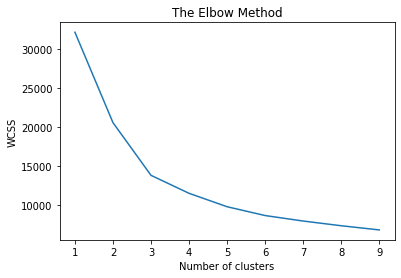

In [64]:
wcss = []
for i in range(1, 10):
    kproto = KPrototypes(n_clusters=i, verbose=2, max_iter=10).fit(stand_data, categorical=[0,1])
    wcss.append(kproto.cost_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

---
---

## Apply K - Mean with (K = 4) 

In [35]:
from kmodes.kprototypes import KPrototypes
kproto = KPrototypes(n_clusters=4, verbose=2, max_iter=20).fit(stand_data, categorical=[0,1])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 3408, ncost: 12019.94243945492
Run: 1, iteration: 2/20, moves: 983, ncost: 11913.410242102082
Run: 1, iteration: 3/20, moves: 410, ncost: 11876.21726545809
Run: 1, iteration: 4/20, moves: 542, ncost: 11802.934144577228
Run: 1, iteration: 5/20, moves: 518, ncost: 11717.65329556108
Run: 1, iteration: 6/20, moves: 601, ncost: 11619.399086800393
Run: 1, iteration: 7/20, moves: 501, ncost: 11549.07876095168
Run: 1, iteration: 8/20, moves: 457, ncost: 11511.462277989609
Run: 1, iteration: 9/20, moves: 409, ncost: 11483.062958080529
Run: 1, iteration: 10/20, moves: 172, ncost: 11477.610848123812
Run: 1, iteration: 11/20, moves: 79, ncost: 11476.241097236114
Run: 1, iteration: 12/20, moves: 31, ncost: 11476.120884705999
Run: 1, iteration: 13/20, moves: 10, ncost: 11476.109815973075
Run: 1, iteration: 14/20, moves: 0, ncost: 11476.109815973075
Init: initializing centroids
Init: initia

In [36]:
clustered_df_k4 = stand_data.assign(Cluster = kproto.labels_)

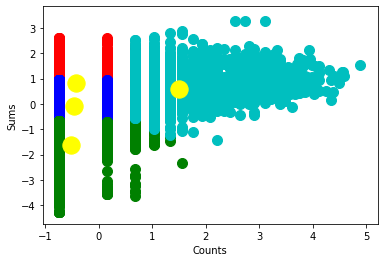

In [37]:
# Visualising the clusters
plt.scatter(clustered_df_k4[clustered_df_k4['Cluster']==0].iloc[:,2], clustered_df_k4[clustered_df_k4['Cluster']==0].iloc[:,3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(clustered_df_k4[clustered_df_k4['Cluster']==1].iloc[:,2], clustered_df_k4[clustered_df_k4['Cluster']==1].iloc[:,3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(clustered_df_k4[clustered_df_k4['Cluster']==2].iloc[:,2], clustered_df_k4[clustered_df_k4['Cluster']==2].iloc[:,3], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(clustered_df_k4[clustered_df_k4['Cluster']==3].iloc[:,2], clustered_df_k4[clustered_df_k4['Cluster']==3].iloc[:,3], s = 100, c = 'c', label = 'Cluster 4')
#plt.scatter(clustered_df_k4[clustered_df_k4['Cluster']==4].iloc[:,2], clustered_df_k4[clustered_df_k4['Cluster']==4].iloc[:,3], s = 100, c = 'm', label = 'Cluster 5')

plt.scatter(kproto.cluster_centroids_[:,0], kproto.cluster_centroids_[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.xlabel('Counts')
plt.ylabel('Sums')
#plt.legend()
plt.show()

In [63]:
print(clustered_df_k4[clustered_df_k4['Cluster']==0].shape[0])
print(clustered_df_k4[clustered_df_k4['Cluster']==1].shape[0])
print(clustered_df_k4[clustered_df_k4['Cluster']==2].shape[0])
print(clustered_df_k4[clustered_df_k4['Cluster']==3].shape[0])


3154
4659
2540
3185


In [42]:
centroids=pd.DataFrame(kproto.cluster_centroids_,columns=['Counts','Sums','primary_medium_desc','transaction_cdi_desc'])
centroids

,Counts,Sums,primary_medium_desc,transaction_cdi_desc
0,-0.432572,0.809525,2.0,1.0
1,-0.456255,-0.063077,6.0,0.0
2,-0.517152,-1.638323,6.0,1.0
3,1.508191,0.597166,6.0,1.0


In [45]:
centroids['Counts']= pd.to_numeric(centroids['Counts'])
centroids['Sums']= pd.to_numeric(centroids['Sums'])

In [46]:
centroids.select_dtypes(include='number').columns

Index(['Counts', 'Sums', 'primary_medium_desc', 'transaction_cdi_desc'], dtype='object')

In [47]:
centroids[['Counts', 'Sums']] = scaler.inverse_transform(centroids[['Counts', 'Sums']] )

In [48]:
centroids[['Counts', 'Sums']]=np.exp(centroids[['Counts', 'Sums']])

In [49]:
centroids

,Counts,Sums,primary_medium_desc,transaction_cdi_desc
0,1.264671,34060.434506,2.0,1.0
1,1.241487,2542.291880,6.0,0.0
2,1.183803,23.479416,6.0,1.0
3,5.760858,18112.296219,6.0,1.0


In [52]:
clustered_df_k4

,primary_medium_desc,transaction_cdi_desc,Counts,Sums,Cluster
0,6,0,-0.733122,-2.537364,2
1,6,0,0.673053,-0.684930,1
2,6,1,1.326888,0.942402,3
3,6,1,-0.733122,-0.885955,2
4,6,0,-0.733122,-0.781664,1
...,...,...,...,...,...
13533,6,1,-0.733122,-1.726937,2
13534,6,0,-0.733122,0.543653,1
13535,6,1,0.154076,0.543584,0
13536,6,1,0.673053,0.252577,3


In [56]:
print(clustered_df_k4[clustered_df_k4['Cluster']==0].shape[0])
print(clustered_df_k4[clustered_df_k4['Cluster']==1].shape[0])
print(clustered_df_k4[clustered_df_k4['Cluster']==2].shape[0])
print(clustered_df_k4[clustered_df_k4['Cluster']==3].shape[0])

3154
4659
2540
3185


---
---
---
---
---

## Apply K - Mean with (K = 3) 

In [69]:
from kmodes.kprototypes import KPrototypes
kproto = KPrototypes(n_clusters=3, verbose=2, max_iter=25).fit(stand_data, categorical=[0,1])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/25, moves: 1616, ncost: 14079.04303402859
Run: 1, iteration: 2/25, moves: 464, ncost: 13977.68200020688
Run: 1, iteration: 3/25, moves: 345, ncost: 13921.389156582269
Run: 1, iteration: 4/25, moves: 332, ncost: 13791.776285434076
Run: 1, iteration: 5/25, moves: 318, ncost: 13789.528692980737
Run: 1, iteration: 6/25, moves: 12, ncost: 13789.490314469034
Run: 1, iteration: 7/25, moves: 0, ncost: 13789.490314469034
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/25, moves: 1459, ncost: 13984.020183544473
Run: 2, iteration: 2/25, moves: 371, ncost: 13934.037719693742
Run: 2, iteration: 3/25, moves: 312, ncost: 13889.969368625632
Run: 2, iteration: 4/25, moves: 357, ncost: 13789.67411979382
Run: 2, iteration: 5/25, moves: 56, ncost: 13789.491976242092
Run: 2, iteration: 6/25, moves: 2, ncost: 13789.490314469034
Run: 2, iteration: 7/25, mov

In [70]:
clustered_df_k3 = stand_data.assign(Cluster = kproto.labels_)

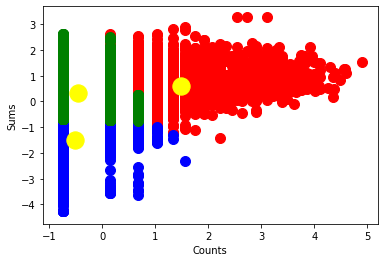

In [71]:
# Visualising the clusters
plt.scatter(clustered_df_k3[clustered_df_k3['Cluster']==0].iloc[:,2], clustered_df_k3[clustered_df_k3['Cluster']==0].iloc[:,3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(clustered_df_k3[clustered_df_k3['Cluster']==1].iloc[:,2], clustered_df_k3[clustered_df_k3['Cluster']==1].iloc[:,3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(clustered_df_k3[clustered_df_k3['Cluster']==2].iloc[:,2], clustered_df_k3[clustered_df_k3['Cluster']==2].iloc[:,3], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(clustered_df_k4[clustered_df_k4['Cluster']==3].iloc[:,2], clustered_df_k4[clustered_df_k4['Cluster']==3].iloc[:,3], s = 100, c = 'c', label = 'Cluster 4')
#plt.scatter(clustered_df_k4[clustered_df_k4['Cluster']==4].iloc[:,2], clustered_df_k4[clustered_df_k4['Cluster']==4].iloc[:,3], s = 100, c = 'm', label = 'Cluster 5')

plt.scatter(kproto.cluster_centroids_[:,0], kproto.cluster_centroids_[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.xlabel('Counts')
plt.ylabel('Sums')
#plt.legend()
plt.show()

In [73]:
print(clustered_df_k3[clustered_df_k3['Cluster']==0].shape[0])
print(clustered_df_k3[clustered_df_k3['Cluster']==1].shape[0])
print(clustered_df_k3[clustered_df_k3['Cluster']==2].shape[0])

3262
2983
7293


In [74]:
centroids=pd.DataFrame(kproto.cluster_centroids_,columns=['Counts','Sums','primary_medium_desc','transaction_cdi_desc'])
centroids

,Counts,Sums,primary_medium_desc,transaction_cdi_desc
0,1.487569,0.612058,6.0,1.0
1,-0.513552,-1.493643,6.0,1.0
2,-0.455303,0.337173,6.0,0.0


In [75]:
centroids['Counts']= pd.to_numeric(centroids['Counts'])
centroids['Sums']= pd.to_numeric(centroids['Sums'])

In [76]:
centroids.select_dtypes(include='number').columns

Index(['Counts', 'Sums', 'primary_medium_desc', 'transaction_cdi_desc'], dtype='object')

In [77]:
centroids[['Counts', 'Sums']] = scaler.inverse_transform(centroids[['Counts', 'Sums']] )

In [78]:
centroids[['Counts', 'Sums']]=np.exp(centroids[['Counts', 'Sums']])

In [79]:
centroids

,Counts,Sums,primary_medium_desc,transaction_cdi_desc
0,5.668786,18932.471415,6.0,1.0
1,1.187138,36.103730,6.0,1.0
2,1.242410,8359.406606,6.0,0.0
